# Plots and analysis

## Imports

In [385]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pingouin as pg

from functions import sig, alter_sig, sigfit, alter_sigfit
pd.options.mode.chained_assignment = None # Stop seeing warnings

In [386]:
df = pd.read_pickle("data/df")

## Comparing means of LDL and HL between groups across frequencies
- T-test LDL per group per frequency
- LDL mean per group per frequency (pointplot)
- LDL mean per group per frequency (boxplot)
- T-test HL per group per frequency
- HL mean per group per frequency (pointplot)
- HL mean per group per frequency (boxplot)

### Preprocessing for this area

In [387]:
df = df[['Código de participante','Group', 'TWI', 'OPI', 'LDL_250', 'LDL_500', 'LDL_1000', 'LDL_2000', 'LDL_4000',
       'LDL_8000', 'LDL_Ear', 'HL_250_R', 'HL_500_R', 'HL_1000_R', 'HL_2000_R',
       'HL_4000_R', 'HL_8000_R', 'HL_250_L', 'HL_500_L', 'HL_1000_L',
       'HL_2000_L', 'HL_4000_L', 'HL_8000_L', 'HL_250', 'HL_500', 'HL_1000',
       'HL_2000', 'HL_4000', 'HL_8000', 'Avg_LDL', 'Avg_HL_L', 'Avg_HL_R',
       'Avg_HL']]

Cannot run with NaN values, so I will drop them by now. However, in the oficial running, Nan participants should be eliminated by now and thus the following cell shouldnt run

In [388]:
df.dropna(inplace=True)
df.sample(10)

,Código de participante,Group,TWI,OPI,LDL_250,LDL_500,LDL_1000,LDL_2000,LDL_4000,LDL_8000,...,HL_250,HL_500,HL_1000,HL_2000,HL_4000,HL_8000,Avg_LDL,Avg_HL_L,Avg_HL_R,Avg_HL
49,GC001,Control,190.209297,0.693333,40.0,45.0,45.0,50.0,40.0,20.0,...,5.0,0.0,0.0,0.0,-5.0,-10.0,40.000000,-1.666667,0.833333,-1.666667
17,AC11,HA,121.067145,0.140000,65.0,90.0,90.0,90.0,90.0,80.0,...,10.0,10.0,5.0,10.0,15.0,-5.0,84.166667,7.500000,9.166667,7.500000
51,GC003,Control,270.643651,0.493333,80.0,100.0,105.0,110.0,85.0,100.0,...,10.0,10.0,15.0,30.0,10.0,10.0,96.666667,15.833333,14.166667,14.166667
40,AC34,HA,101.080018,0.146667,60.0,70.0,80.0,50.0,45.0,25.0,...,0.0,0.0,5.0,5.0,0.0,-10.0,55.000000,0.000000,2.500000,0.000000
27,AC21,HA,135.635361,0.320000,80.0,75.0,95.0,90.0,90.0,95.0,...,0.0,-5.0,0.0,0.0,-5.0,5.0,87.500000,-0.833333,0.833333,-0.833333
36,AC30,HA,175.928944,0.406667,75.0,60.0,85.0,85.0,75.0,70.0,...,10.0,15.0,15.0,15.0,5.0,10.0,75.000000,11.666667,11.666667,11.666667
38,AC32,HA,156.353251,0.540000,100.0,110.0,110.0,110.0,110.0,100.0,...,25.0,25.0,25.0,10.0,10.0,15.0,106.666667,17.500000,18.333333,18.333333
25,AC19,HA,142.467822,0.486667,50.0,60.0,60.0,50.0,30.0,30.0,...,-5.0,0.0,0.0,0.0,0.0,0.0,46.666667,1.666667,-0.833333,-0.833333
28,AC22,HA,117.884330,0.146667,70.0,65.0,65.0,65.0,65.0,70.0,...,10.0,5.0,15.0,0.0,0.0,10.0,66.666667,10.833333,6.666667,6.666667
12,AC06,HA,228.092143,0.473333,80.0,100.0,120.0,115.0,115.0,100.0,...,5.0,5.0,5.0,-5.0,0.0,-10.0,105.000000,0.000000,1.666667,0.000000


### Loudness Discomfort Level (LDL) between groups

#### Preprocessing for these plots

In [389]:
df_pointplots = df[['Código de participante', 'Group','LDL_250', 'LDL_500', 'LDL_1000', 'LDL_2000', 'LDL_4000',
       'LDL_8000', 'LDL_Ear', 'HL_250_R', 'HL_500_R', 'HL_1000_R', 'HL_2000_R',
       'HL_4000_R', 'HL_8000_R', 'HL_250_L', 'HL_500_L', 'HL_1000_L',
       'HL_2000_L', 'HL_4000_L', 'HL_8000_L', 'HL_250', 'HL_500', 'HL_1000',
       'HL_2000', 'HL_4000', 'HL_8000']]

In [390]:
# Split groups
df_pointplots_HA= df_pointplots[df_pointplots["Group"]=="HA"]
df_pointplots_control= df_pointplots[df_pointplots["Group"]=="Control"]

# Melt for HA
df_pointplots_HA = pd.melt(df_pointplots_HA, id_vars=['Código de participante'], value_vars=['LDL_250', 'LDL_500', 'LDL_1000', 'LDL_2000', 'LDL_4000',
       'LDL_8000'])
df_pointplots_HA["Group"] = "HA"

# Melt for control
df_pointplots_control = pd.melt(df_pointplots_control, id_vars=['Código de participante'], value_vars=['LDL_250', 'LDL_500', 'LDL_1000', 'LDL_2000', 'LDL_4000',
       'LDL_8000'])
df_pointplots_control["Group"] = "Control"

# Concat 
df_pointplots_ldl = pd.concat([df_pointplots_HA, df_pointplots_control])

df_pointplots_ldl

,Código de participante,variable,value,Group
0,AC01,LDL_250,60.0,HA
1,AC02,LDL_250,80.0,HA
2,AC03,LDL_250,80.0,HA
3,AC05,LDL_250,80.0,HA
4,AC06,LDL_250,80.0,HA
...,...,...,...,...
7,GC003,LDL_2000,110.0,Control
8,GC001,LDL_4000,40.0,Control
9,GC003,LDL_4000,85.0,Control
10,GC001,LDL_8000,20.0,Control


In [391]:
# Rename columns
df_pointplots_ldl.columns = ["ID", "Frequency", "Db", "Group"]

#### T tests

In [392]:
df_pointplots.head(5)

,Código de participante,Group,LDL_250,LDL_500,LDL_1000,LDL_2000,LDL_4000,LDL_8000,LDL_Ear,HL_250_R,...,HL_1000_L,HL_2000_L,HL_4000_L,HL_8000_L,HL_250,HL_500,HL_1000,HL_2000,HL_4000,HL_8000
7,AC01,HA,60.0,60.0,70.0,70.0,50.0,55.0,L,20.0,...,10.0,10.0,15.0,20.0,10.0,10.0,10.0,10.0,15.0,20.0
8,AC02,HA,80.0,100.0,85.0,85.0,85.0,90.0,L,10.0,...,10.0,5.0,10.0,15.0,10.0,5.0,10.0,5.0,10.0,15.0
9,AC03,HA,80.0,100.0,90.0,95.0,100.0,100.0,L,20.0,...,5.0,5.0,5.0,5.0,10.0,10.0,5.0,5.0,5.0,5.0
11,AC05,HA,80.0,95.0,100.0,105.0,100.0,80.0,L,5.0,...,0.0,5.0,5.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0
12,AC06,HA,80.0,100.0,120.0,115.0,115.0,100.0,L,0.0,...,5.0,-5.0,0.0,-10.0,5.0,5.0,5.0,-5.0,0.0,-10.0


In [425]:
df_HA = df_pointplots[df_pointplots["Group"]=="HA"]
df_Control = df_pointplots[df_pointplots["Group"]=="Control"]

freqs = ["LDL_250","LDL_500","LDL_1000","LDL_2000",
         "LDL_4000", "LDL_8000"]

for frequency in freqs:
    print("t test for %s" % (frequency))
    display(pg.ttest(df_HA[frequency], df_Control[frequency]))  

t test for LDL_250


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.631327,1.060161,two-sided,0.636585,"[-212.92, 238.54]",0.848478,0.6,0.186465


t test for LDL_500


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.302669,1.055926,two-sided,0.810816,"[-304.38, 321.25]",0.417865,0.553,0.082058


t test for LDL_1000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.401493,1.048199,two-sided,0.754503,"[-334.03, 358.4]",0.584832,0.563,0.113612


t test for LDL_2000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.112522,1.075213,two-sided,0.927674,"[-326.1, 332.97]",0.138996,0.541,0.053495


t test for LDL_4000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.761917,1.16508,two-sided,0.570281,"[-196.11, 231.74]",0.689253,0.63,0.139083


t test for LDL_8000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.316423,1.05004,two-sided,0.802946,"[-447.21, 472.84]",0.454798,0.554,0.088079


#### Plots

/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_72778/902036402.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


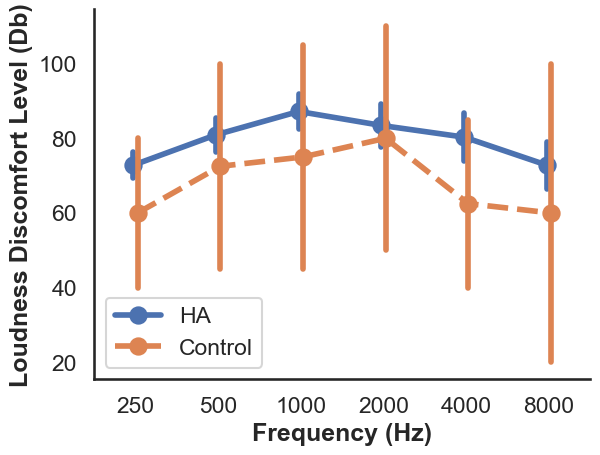

In [394]:
sns.set_context("talk")

fig = sns.pointplot(data=df_pointplots_ldl,x='Frequency', y = "Db", hue="Group", 
              linestyles=["-", "--"], errorbar="se", dodge=True)
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel("Loudness Discomfort Level (Db)", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={'weight': 'bold'})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_72778/720931620.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


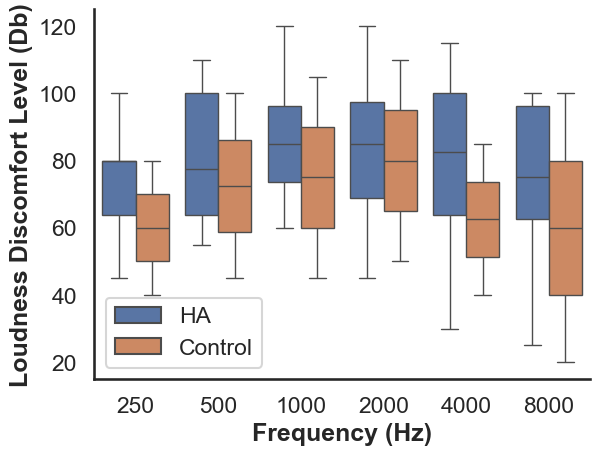

In [395]:
sns.set_context("talk")
fig = sns.boxplot(data=df_pointplots_ldl,x='Frequency', y = "Db", hue="Group", 
              dodge=True)
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel("Loudness Discomfort Level (Db)", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={'weight': 'bold'})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

### Hearing Level (HL) between groups

#### Preprocessing
dataset must be in melt form

In [396]:
df_pointplots.head(5)

,Código de participante,Group,LDL_250,LDL_500,LDL_1000,LDL_2000,LDL_4000,LDL_8000,LDL_Ear,HL_250_R,...,HL_1000_L,HL_2000_L,HL_4000_L,HL_8000_L,HL_250,HL_500,HL_1000,HL_2000,HL_4000,HL_8000
7,AC01,HA,60.0,60.0,70.0,70.0,50.0,55.0,L,20.0,...,10.0,10.0,15.0,20.0,10.0,10.0,10.0,10.0,15.0,20.0
8,AC02,HA,80.0,100.0,85.0,85.0,85.0,90.0,L,10.0,...,10.0,5.0,10.0,15.0,10.0,5.0,10.0,5.0,10.0,15.0
9,AC03,HA,80.0,100.0,90.0,95.0,100.0,100.0,L,20.0,...,5.0,5.0,5.0,5.0,10.0,10.0,5.0,5.0,5.0,5.0
11,AC05,HA,80.0,95.0,100.0,105.0,100.0,80.0,L,5.0,...,0.0,5.0,5.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0
12,AC06,HA,80.0,100.0,120.0,115.0,115.0,100.0,L,0.0,...,5.0,-5.0,0.0,-10.0,5.0,5.0,5.0,-5.0,0.0,-10.0


In [397]:
# Split groups
df_pointplots_HA= df_pointplots[df_pointplots["Group"]=="HA"]
df_pointplots_control= df_pointplots[df_pointplots["Group"]=="Control"]

# Melt for HA
df_pointplots_HA = pd.melt(df_pointplots_HA, id_vars=['Código de participante'], value_vars=['HL_250', 'HL_500', 'HL_1000',
       'HL_2000', 'HL_4000', 'HL_8000'])
df_pointplots_HA["Group"] = "HA"

# Melt for control
df_pointplots_control = pd.melt(df_pointplots_control, id_vars=['Código de participante'], value_vars=['HL_250', 'HL_500', 'HL_1000',
       'HL_2000', 'HL_4000', 'HL_8000'])
df_pointplots_control["Group"] = "Control"

# Concat 
df_pointplots_hl = pd.concat([df_pointplots_HA, df_pointplots_control])

df_pointplots_hl

,Código de participante,variable,value,Group
0,AC01,HL_250,10.0,HA
1,AC02,HL_250,10.0,HA
2,AC03,HL_250,10.0,HA
3,AC05,HL_250,5.0,HA
4,AC06,HL_250,5.0,HA
...,...,...,...,...
7,GC003,HL_2000,30.0,Control
8,GC001,HL_4000,-5.0,Control
9,GC003,HL_4000,10.0,Control
10,GC001,HL_8000,-10.0,Control


In [398]:
df_pointplots_hl.columns = ["ID", "Frequency", "Db", "Group"]

#### T-tests

In [426]:
df_HA = df_pointplots[df_pointplots["Group"]=="HA"]
df_Control = df_pointplots[df_pointplots["Group"]=="Control"]

freqs = ["HL_250","HL_500","HL_1000","HL_2000",
         "HL_4000", "HL_8000"]

for frequency in freqs:
    print("t test for %s" % (frequency))
    display(pg.ttest(df_HA[frequency], df_Control[frequency]))  

t test for HL_250


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.104447,2.026216,two-sided,0.926236,"[-13.03, 12.4]",0.048622,0.541,0.050427


t test for HL_500


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.294935,1.259094,two-sided,0.809229,"[-40.43, 43.55]",0.222939,0.552,0.059019


t test for HL_1000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.0,1.121768,two-sided,1.0,"[-76.18, 76.18]",0.0,0.539,0.05


t test for HL_2000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.664211,1.014866,two-sided,0.625428,"[-194.8, 174.8]",1.371989,0.607,0.405136


t test for HL_4000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.327327,1.075347,two-sided,0.795611,"[-79.86, 84.86]",0.404061,0.555,0.079945


t test for HL_8000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.212225,1.128475,two-sided,0.863741,"[-98.31, 102.68]",0.212316,0.546,0.058176


#### Plots

/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_72778/3399500249.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


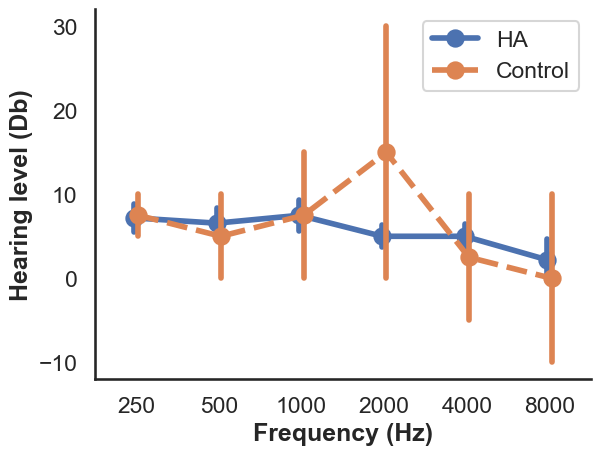

In [400]:
sns.set_context("talk")

fig = sns.pointplot(data=df_pointplots_hl,x='Frequency', y = "Db", hue="Group", 
              linestyles=["-", "--"], errorbar="se", dodge=True)
#plt.title("Hearing Level (Db) per Frequency (Hz)")
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
#plt.xticks(['HL_250', 'HL_500', 'HL_1000', 'HL_2000', 'HL_4000', 'HL_8000'], [250, 'HL_500', 'HL_1000','HL_2000', 'HL_4000', 'HL_8000']) 
fig.set_xlabel("Frequency (Hz)", fontdict={'weight': 'bold'})
fig.set_ylabel("Hearing level (Db)", fontdict={'weight': 'bold'})
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)

handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_72778/1325980745.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


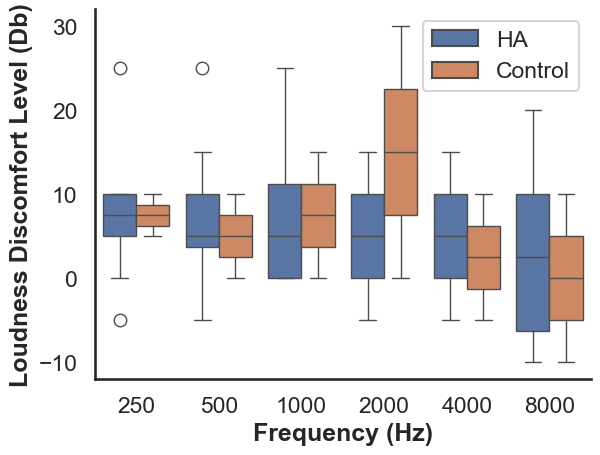

In [401]:
sns.set_context("talk")
fig = sns.boxplot(data=df_pointplots_hl,x='Frequency', y = "Db", hue="Group")
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel("Loudness Discomfort Level (Db)", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={'weight': 'bold'})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

## Analysis with AQ Score
- AQ Score X OPI (pearson correlation and plot)
- AQ Score X TWI (pearson correlation and plot)
- AQ Score X HL (pearson correlation and plot)
- AQ Score X LDL (pearson correlation and plot)
- TWI - group difference according to matching autism questionnaire criteria for autism evaluation and not (t test and plot)
- OPI -  group difference according to matching autism questionnaire criteria for autism evaluation and not  (t test and plot)

In [402]:
df = pd.read_pickle("data/df")

### AQ X OPI, AQ X TWI

In [403]:
x = df["AQ_TOTAL"]
y = df["TWI"]

pg.corr(x,y).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,20,0.027,"[-0.42, 0.46]",0.91,0.278,0.051


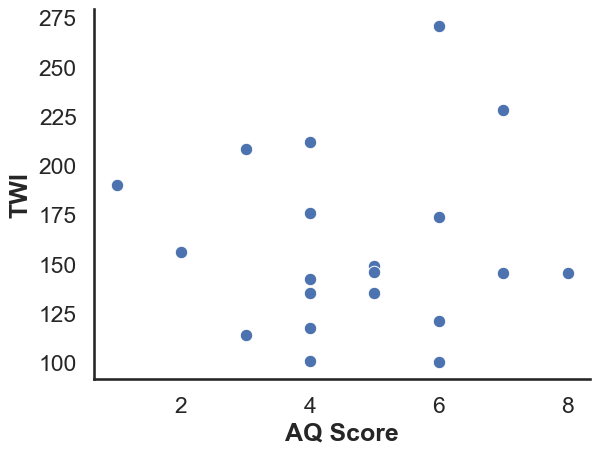

In [404]:
sns.set_context("talk")
sns.axes_style({'font.sans-serif':'Computer Modern Sans Serif'})

fig = sns.scatterplot(data = df, x = "AQ_TOTAL", y = "TWI")
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_ylabel("TWI", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("AQ Score", fontdict={'weight': 'bold'})

plt.show()

In [405]:
x = df["AQ_TOTAL"]
y = df["OPI"]

pg.corr(x,y).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,22,-0.487,"[-0.75, -0.08]",0.021,3.175,0.658


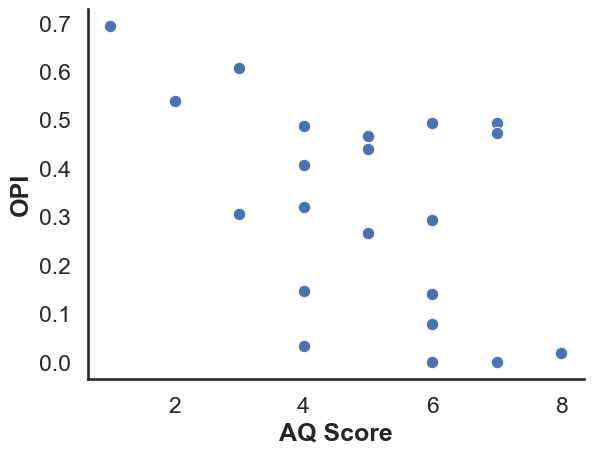

In [406]:
sns.set_context("talk")
fig = sns.scatterplot(data = df, x = "AQ_TOTAL", y = "OPI")
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_ylabel("OPI", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("AQ Score", fontdict={'weight': 'bold'})
plt.show()

### AQ X LDL

t test for LDL_250


,n,r,CI95%,p-val,BF10,power
pearson,22,0.343897,"[-0.09, 0.67]",0.117091,0.839,0.356826


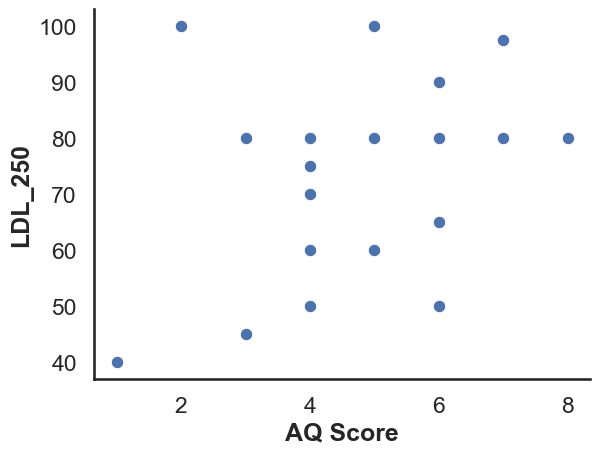

t test for LDL_500


,n,r,CI95%,p-val,BF10,power
pearson,22,0.492254,"[0.09, 0.76]",0.019954,3.365,0.668168


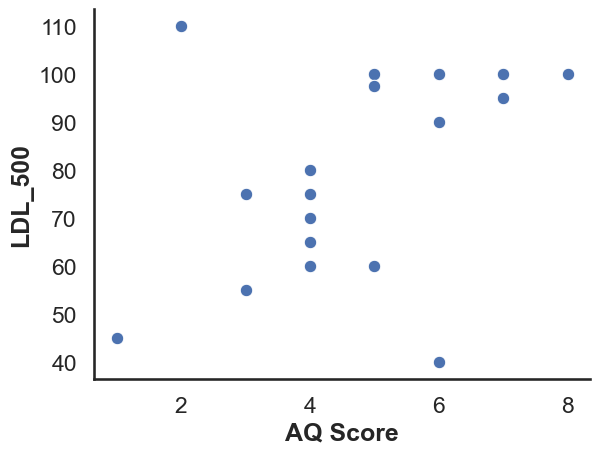

t test for LDL_1000


,n,r,CI95%,p-val,BF10,power
pearson,22,0.547625,"[0.16, 0.79]",0.008336,6.935,0.779843


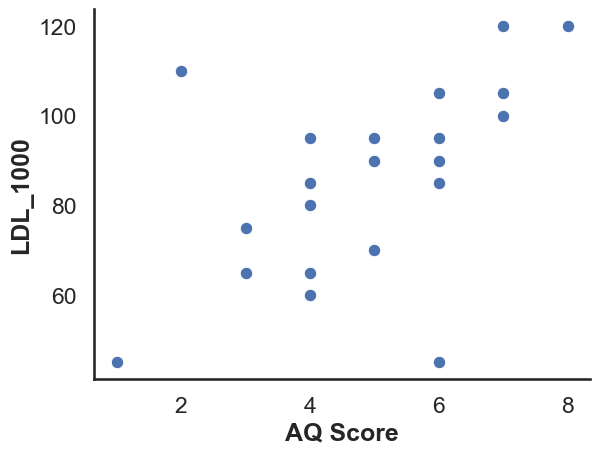

t test for LDL_2000


,n,r,CI95%,p-val,BF10,power
pearson,22,0.541026,"[0.15, 0.78]",0.009321,6.316,0.767336


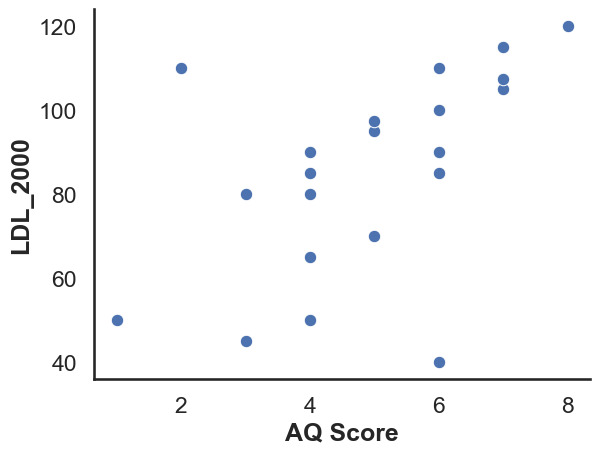

t test for LDL_4000


,n,r,CI95%,p-val,BF10,power
pearson,22,0.442434,"[0.03, 0.73]",0.039221,1.949,0.560299


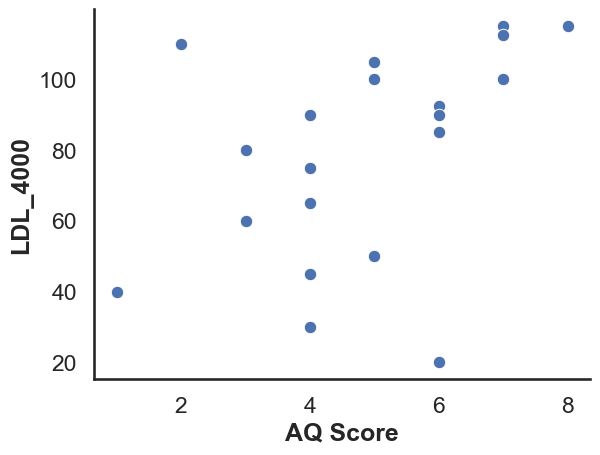

t test for LDL_8000


,n,r,CI95%,p-val,BF10,power
pearson,22,0.49736,"[0.1, 0.76]",0.018516,3.578,0.678985


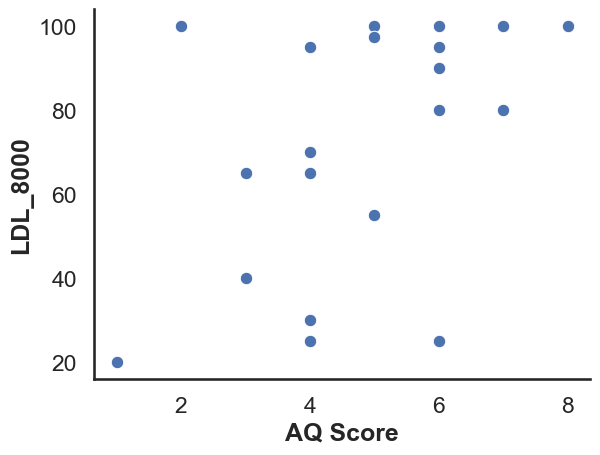

In [424]:
freqs = ["LDL_250","LDL_500","LDL_1000","LDL_2000",
         "LDL_4000", "LDL_8000"]

for frequency in freqs:
    print("t test for %s" % (frequency))
    display(pg.corr(df[frequency], df["AQ_TOTAL"]))

    sns.set_context("talk")
    fig = sns.scatterplot(data = df, x = "AQ_TOTAL", y = frequency)
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    fig.set_ylabel(frequency, fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
    fig.set_xlabel("AQ Score", fontdict={'weight': 'bold'})
    plt.show()

### AQ X HL

t test for HL_250


,n,r,CI95%,p-val,BF10,power
pearson,22,0.04316,"[-0.39, 0.46]",0.848752,0.269,0.053549


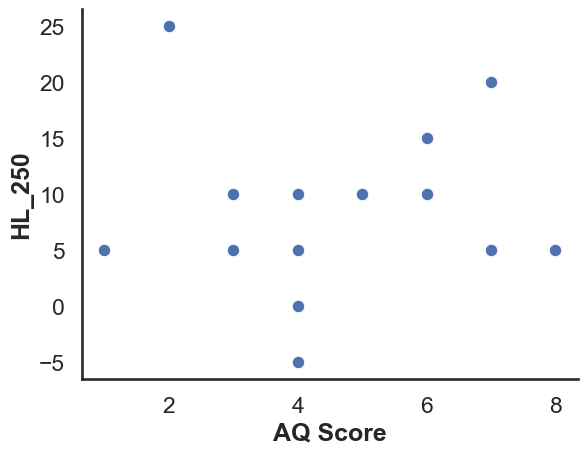

t test for HL_500


,n,r,CI95%,p-val,BF10,power
pearson,22,0.111744,"[-0.33, 0.51]",0.620538,0.297,0.078267


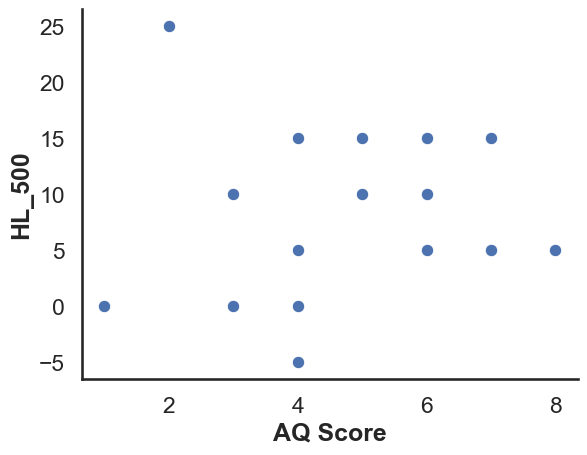

t test for HL_1000


,n,r,CI95%,p-val,BF10,power
pearson,22,-0.048287,"[-0.46, 0.38]",0.831023,0.27,0.054618


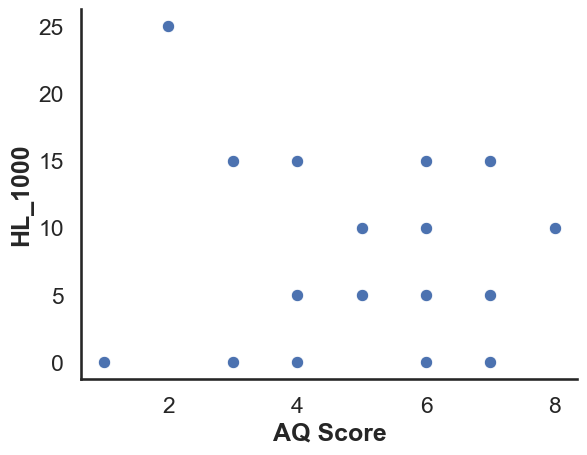

t test for HL_2000


,n,r,CI95%,p-val,BF10,power
pearson,22,0.245044,"[-0.2, 0.6]",0.27171,0.467,0.198668


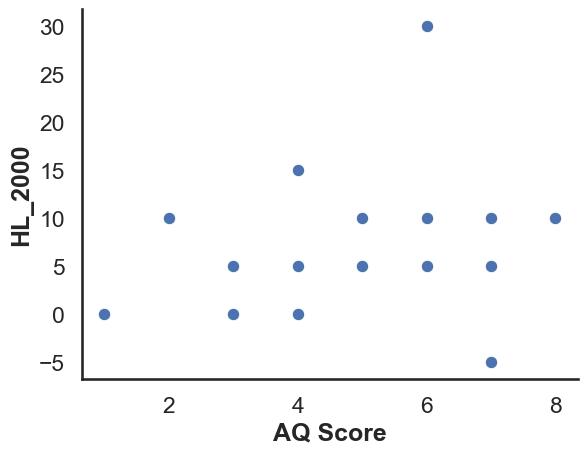

t test for HL_4000


,n,r,CI95%,p-val,BF10,power
pearson,22,0.086647,"[-0.35, 0.49]",0.701417,0.283,0.06656


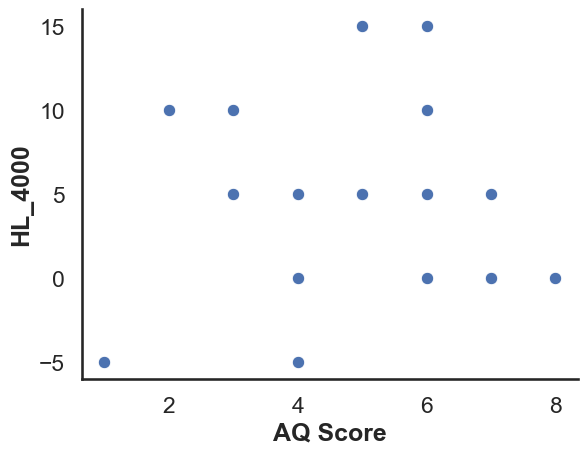

t test for HL_8000


,n,r,CI95%,p-val,BF10,power
pearson,22,-0.028578,"[-0.44, 0.4]",0.899539,0.266,0.051169


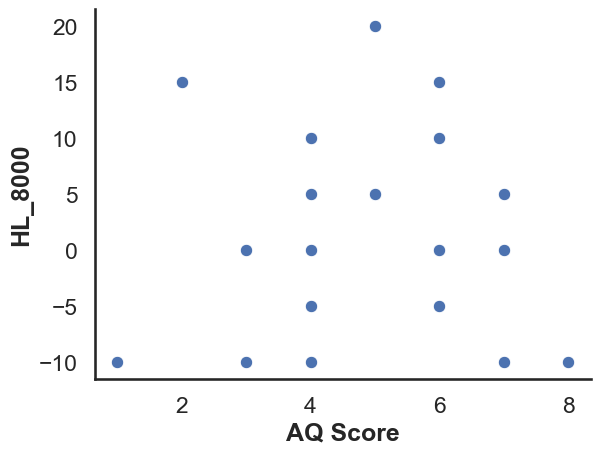

In [427]:
freqs = ["HL_250","HL_500","HL_1000","HL_2000",
         "HL_4000", "HL_8000"]

for frequency in freqs:
    print("t test for %s" % (frequency))
    display(pg.corr(df[frequency], df["AQ_TOTAL"]))

    sns.set_context("talk")
    fig = sns.scatterplot(data = df, x = "AQ_TOTAL", y = frequency)
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    fig.set_ylabel(frequency, fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
    fig.set_xlabel("AQ Score", fontdict={'weight': 'bold'})
    plt.show()

### Group differences (autism criteria vs no autism criteria) and TWI and OPI

In [407]:
df_MC = df[df["AQ_MC"]==True]
df_NOT_MC = df[df["AQ_MC"]==False]

measurement = "OPI"
print("t test for %s" % (measurement))
display(pg.ttest(df_MC[measurement], df_NOT_MC[measurement]))

t test for OPI


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.684764,15.91274,two-sided,0.111542,"[-0.34, 0.04]",0.747699,1.032,0.375267


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_72778/721782133.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


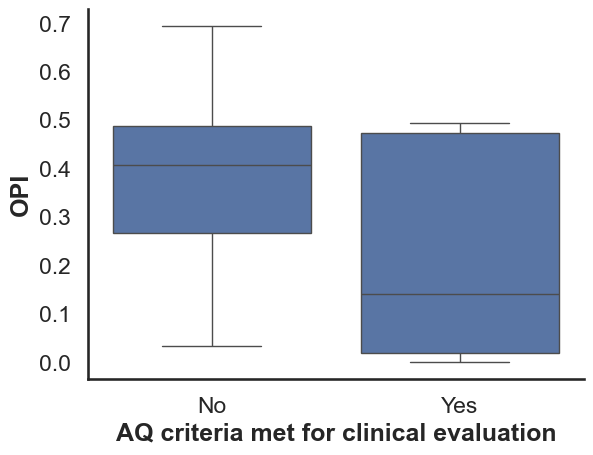

In [408]:
sns.set_context("talk")
fig = sns.boxplot(data=df,x='AQ_MC', y = "OPI")
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel("OPI", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("AQ criteria met for clinical evaluation", fontdict={'weight': 'bold'})

plt.show()

In [409]:
measurement = "TWI"
print("t test for %s" % (measurement))
display(pg.ttest(df_MC[measurement], df_NOT_MC[measurement]))

t test for TWI


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.669886,8.226335,two-sided,0.521287,"[-40.37, 73.66]",0.368687,0.479,0.115637


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_72778/2744700354.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


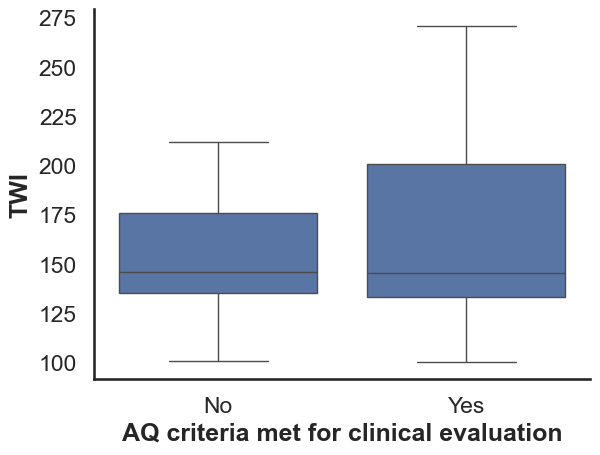

In [410]:
sns.set_context("talk")
fig = sns.boxplot(data=df,x='AQ_MC', y = "TWI")
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel("TWI", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("AQ criteria met for clinical evaluation", fontdict={'weight': 'bold'})

plt.show()

## AvgLDL x TWI | AvgLDL x OPI

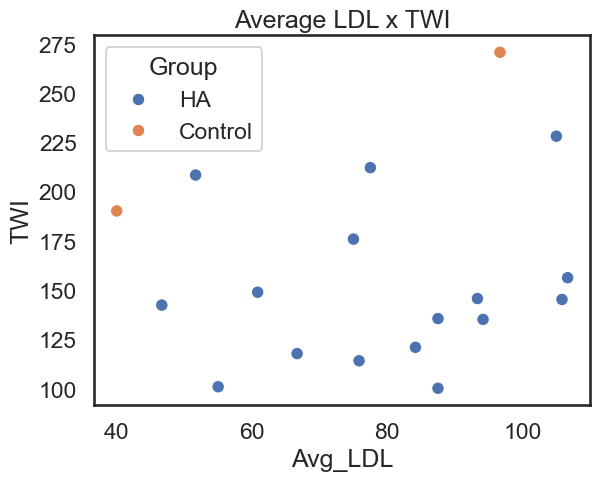

In [411]:
sns.scatterplot(data = df, x = "Avg_LDL", y = "TWI", hue = "Group")
plt.title("Average LDL x TWI")
plt.show()

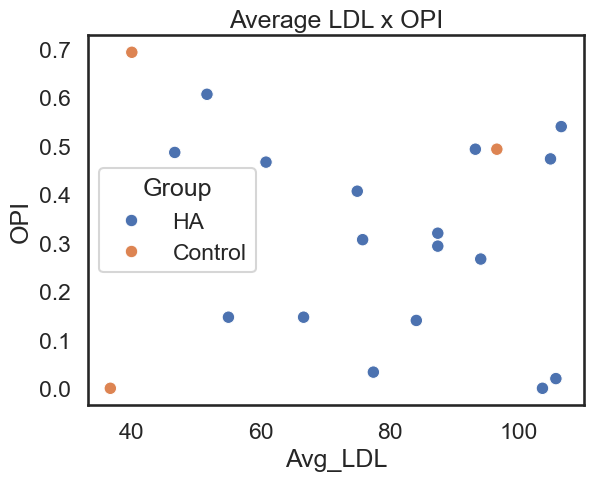

In [412]:
sns.scatterplot(data = df, x = "Avg_LDL", y = "OPI", hue = "Group")
plt.title("Average LDL x OPI")
plt.show()

### AvgHL most sensitive ear x OPI

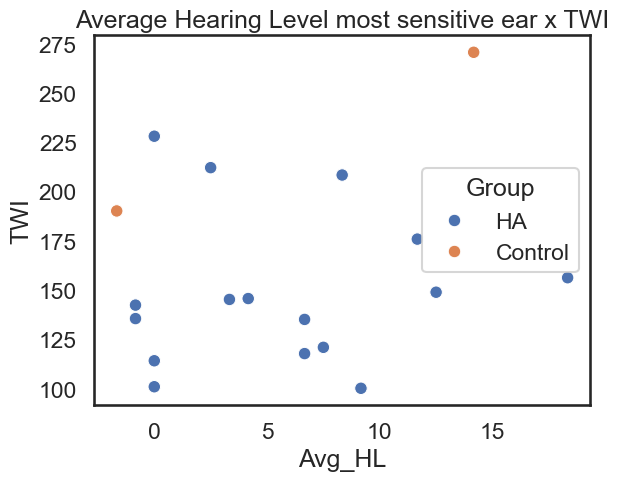

In [413]:
sns.scatterplot(data = df, x = "Avg_HL", y = "TWI", hue = "Group")
plt.title("Average Hearing Level most sensitive ear x TWI")
plt.show()

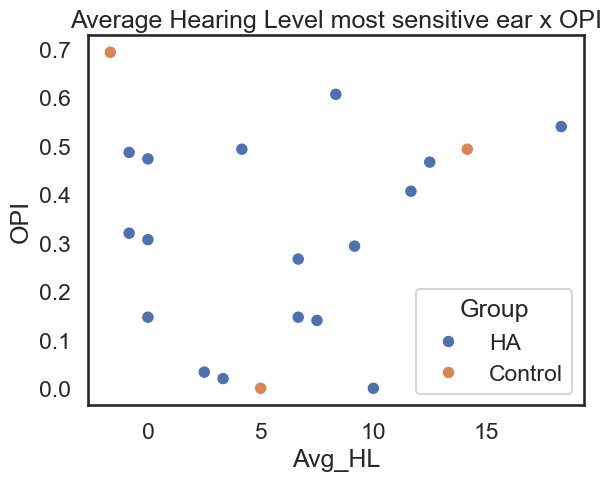

In [414]:
sns.scatterplot(data = df, x = "Avg_HL", y = "OPI", hue = "Group")
plt.title("Average Hearing Level most sensitive ear x OPI")
plt.show()
